<a href="https://www.kaggle.com/code/heemalichaudhari/mental-state-prediction?scriptVersionId=114584156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

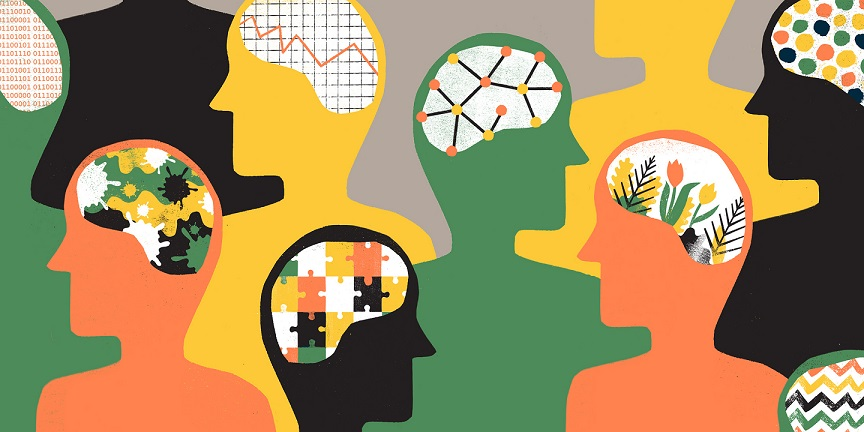

Mental state prediction is the process of using machine learning techniques to predict the mental state of an individual based on certain characteristics or features. One approach to mental state prediction is using a random forest, which is a type of ensemble machine learning method that consists of a collection of decision trees.

To use a random forest for mental state prediction, you would first need to gather data on individuals with known mental states. This could include information about their demographics, behaviors, and any other relevant features. You would then use this data to train a random forest model to predict the mental state of new individuals based on their characteristics.

To train the model, you would use a supervised learning approach, in which the model is presented with a set of labeled training examples that include both the input features and the corresponding mental state labels. The model would then learn to predict the mental state of new individuals based on the patterns it has learned from the training data.

Once the model has been trained, you can use it to predict the mental state of new individuals by providing it with the relevant input features and letting it generate a prediction based on the patterns it has learned from the training data.

It is important to note that mental state prediction is a complex task and there are many factors that can influence an individual's mental state. As such, the accuracy of a mental state prediction model will depend on the quality and quantity of the training data, as well as the specific machine learning algorithm and hyperparameters used.

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# READING THE DATA:

In [2]:
df=pd.read_csv("../input/fortnite-statistics-corresponding-to-mental-state/FortniteStatistics.csv",engine="python");df.head()

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070


In [3]:
df["Time of Day"].unique()

array(['6:00 PM', '7:00 PM', '8:00 PM', '1:00 PM', '2:00 PM', '3:00 PM',
       '9:00 PM', '12:00 PM', '4:00 PM', '5:00 PM', '10:00 PM',
       '11:00 PM'], dtype=object)

# SHAPE OF THE DATA:

In [4]:
df.shape

(80, 16)

# DESCRIBING THE DATA:

In [5]:
df1=df.describe().transpose();df1

,count,mean,std,min,25%,50%,75%,max
Placed,80.0,22.050000,13.340620,1.00,14.750,21.000,28.25,66.0
Eliminations,80.0,2.475000,1.834790,0.00,1.000,2.000,3.00,8.0
Assists,80.0,1.500000,1.423136,0.00,0.000,1.000,2.00,6.0
Revives,80.0,0.375000,0.718208,0.00,0.000,0.000,1.00,4.0
Hits,80.0,29.112500,21.020179,1.00,12.750,27.000,38.00,105.0
Head Shots,80.0,4.637500,5.737383,0.00,1.000,3.000,6.25,33.0
Distance Traveled,80.0,1156.115375,1101.028029,17.86,415.445,639.425,1650.00,4460.0
Materials Gathered,80.0,388.687500,569.463874,0.00,74.000,165.000,423.00,3002.0
Materials Used,80.0,126.575000,231.139926,0.00,20.000,50.000,150.00,1740.0
Damage Taken,80.0,244.387500,121.671221,19.00,156.250,215.500,316.25,677.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  80 non-null     object 
 1   Time of Day           80 non-null     object 
 2   Placed                80 non-null     int64  
 3   Mental State          80 non-null     object 
 4   Eliminations          80 non-null     int64  
 5   Assists               80 non-null     int64  
 6   Revives               80 non-null     int64  
 7   Accuracy              80 non-null     object 
 8   Hits                  80 non-null     int64  
 9   Head Shots            80 non-null     int64  
 10  Distance Traveled     80 non-null     float64
 11  Materials Gathered    80 non-null     int64  
 12  Materials Used        80 non-null     int64  
 13  Damage Taken          80 non-null     int64  
 14  Damage to Players     80 non-null     int64  
 15  Damage to Structures  80 

In [7]:
df.Accuray=df.Accuracy.replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
df.Accuracy=df.Accuracy.astype("float")
df.dtypes

Date                     object
Time of Day              object
Placed                    int64
Mental State             object
Eliminations              int64
Assists                   int64
Revives                   int64
Accuracy                float64
Hits                      int64
Head Shots                int64
Distance Traveled       float64
Materials Gathered        int64
Materials Used            int64
Damage Taken              int64
Damage to Players         int64
Damage to Structures      int64
dtype: object

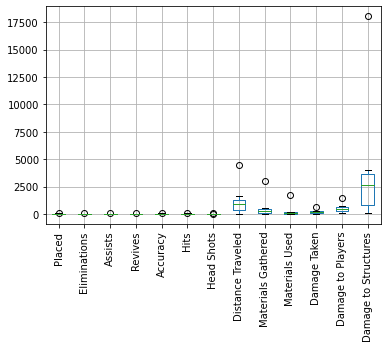

In [8]:
df.describe().boxplot()
plt.xticks(rotation=90)
plt.show()

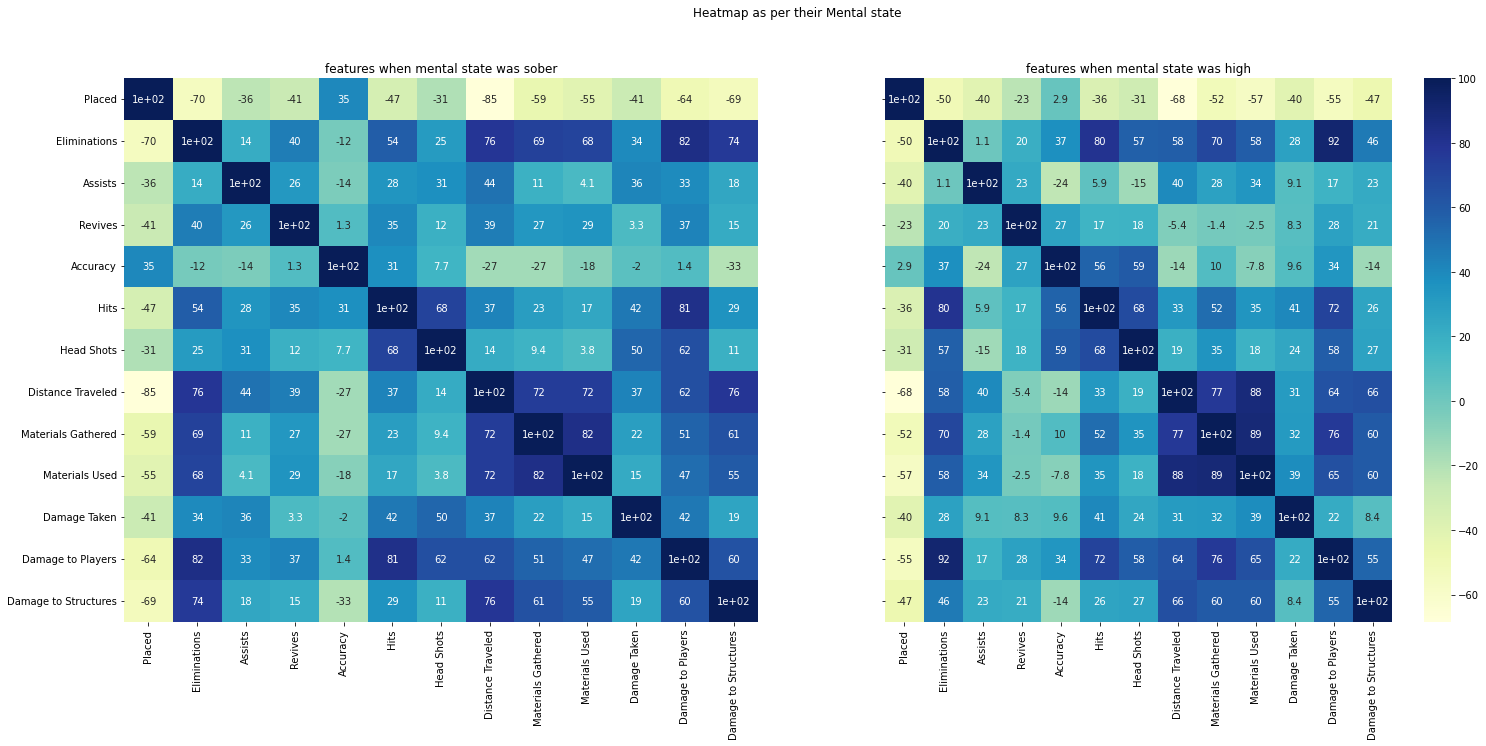

In [9]:
f,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(25,10))
g1 = sns.heatmap(df[df["Mental State"]=="sober"].corr()*100,cmap="YlGnBu",cbar=False,ax=ax1,annot=True)
g1.set_title('features when mental state was sober')
g2 = sns.heatmap(df[df["Mental State"]=="high"].corr()*100,cmap="YlGnBu",cbar=True,ax=ax2,annot=True)
g2.set_title('features when mental state was high')
plt.suptitle("Heatmap as per their Mental state ")
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Mental State"]=labelencoder.fit_transform(df['Mental State']).astype("int")
df["Accuracy"]=labelencoder.fit_transform(df['Accuracy']).astype("float")
df["Time of Day"]= [i.replace(':00 PM', '') for i in df["Time of Day"]]
df["Time of Day"]=pd.to_numeric(df["Time of Day"], errors='ignore')

In [11]:
df.dtypes

Date                     object
Time of Day               int64
Placed                    int64
Mental State              int64
Eliminations              int64
Assists                   int64
Revives                   int64
Accuracy                float64
Hits                      int64
Head Shots                int64
Distance Traveled       float64
Materials Gathered        int64
Materials Used            int64
Damage Taken              int64
Damage to Players         int64
Damage to Structures      int64
dtype: object

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'Eliminations'),
  Text(2, 0, 'Assists'),
  Text(3, 0, 'Revives'),
  Text(4, 0, 'Accuracy'),
  Text(5, 0, 'Hits'),
  Text(6, 0, 'Head Shots'),
  Text(7, 0, 'Distance Traveled'),
  Text(8, 0, 'Materials Gathered'),
  Text(9, 0, 'Materials Used'),
  Text(10, 0, 'Damage Taken'),
  Text(11, 0, 'Damage to Players'),
  Text(12, 0, 'Damage to Structures')])

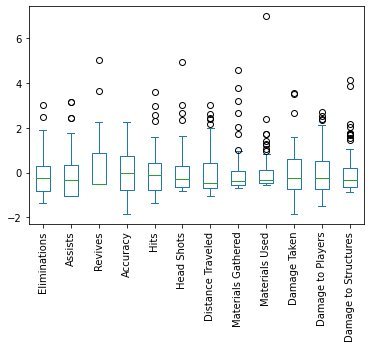

In [12]:
df.iloc[:,4:].apply(lambda x: (x-x.mean())/ x.std()).plot.box()#Normalize the columns to see the unbiaseness in short perspective
plt.xticks(rotation=90) # player is an average one.
#most of time he played in his zone vary less outliers

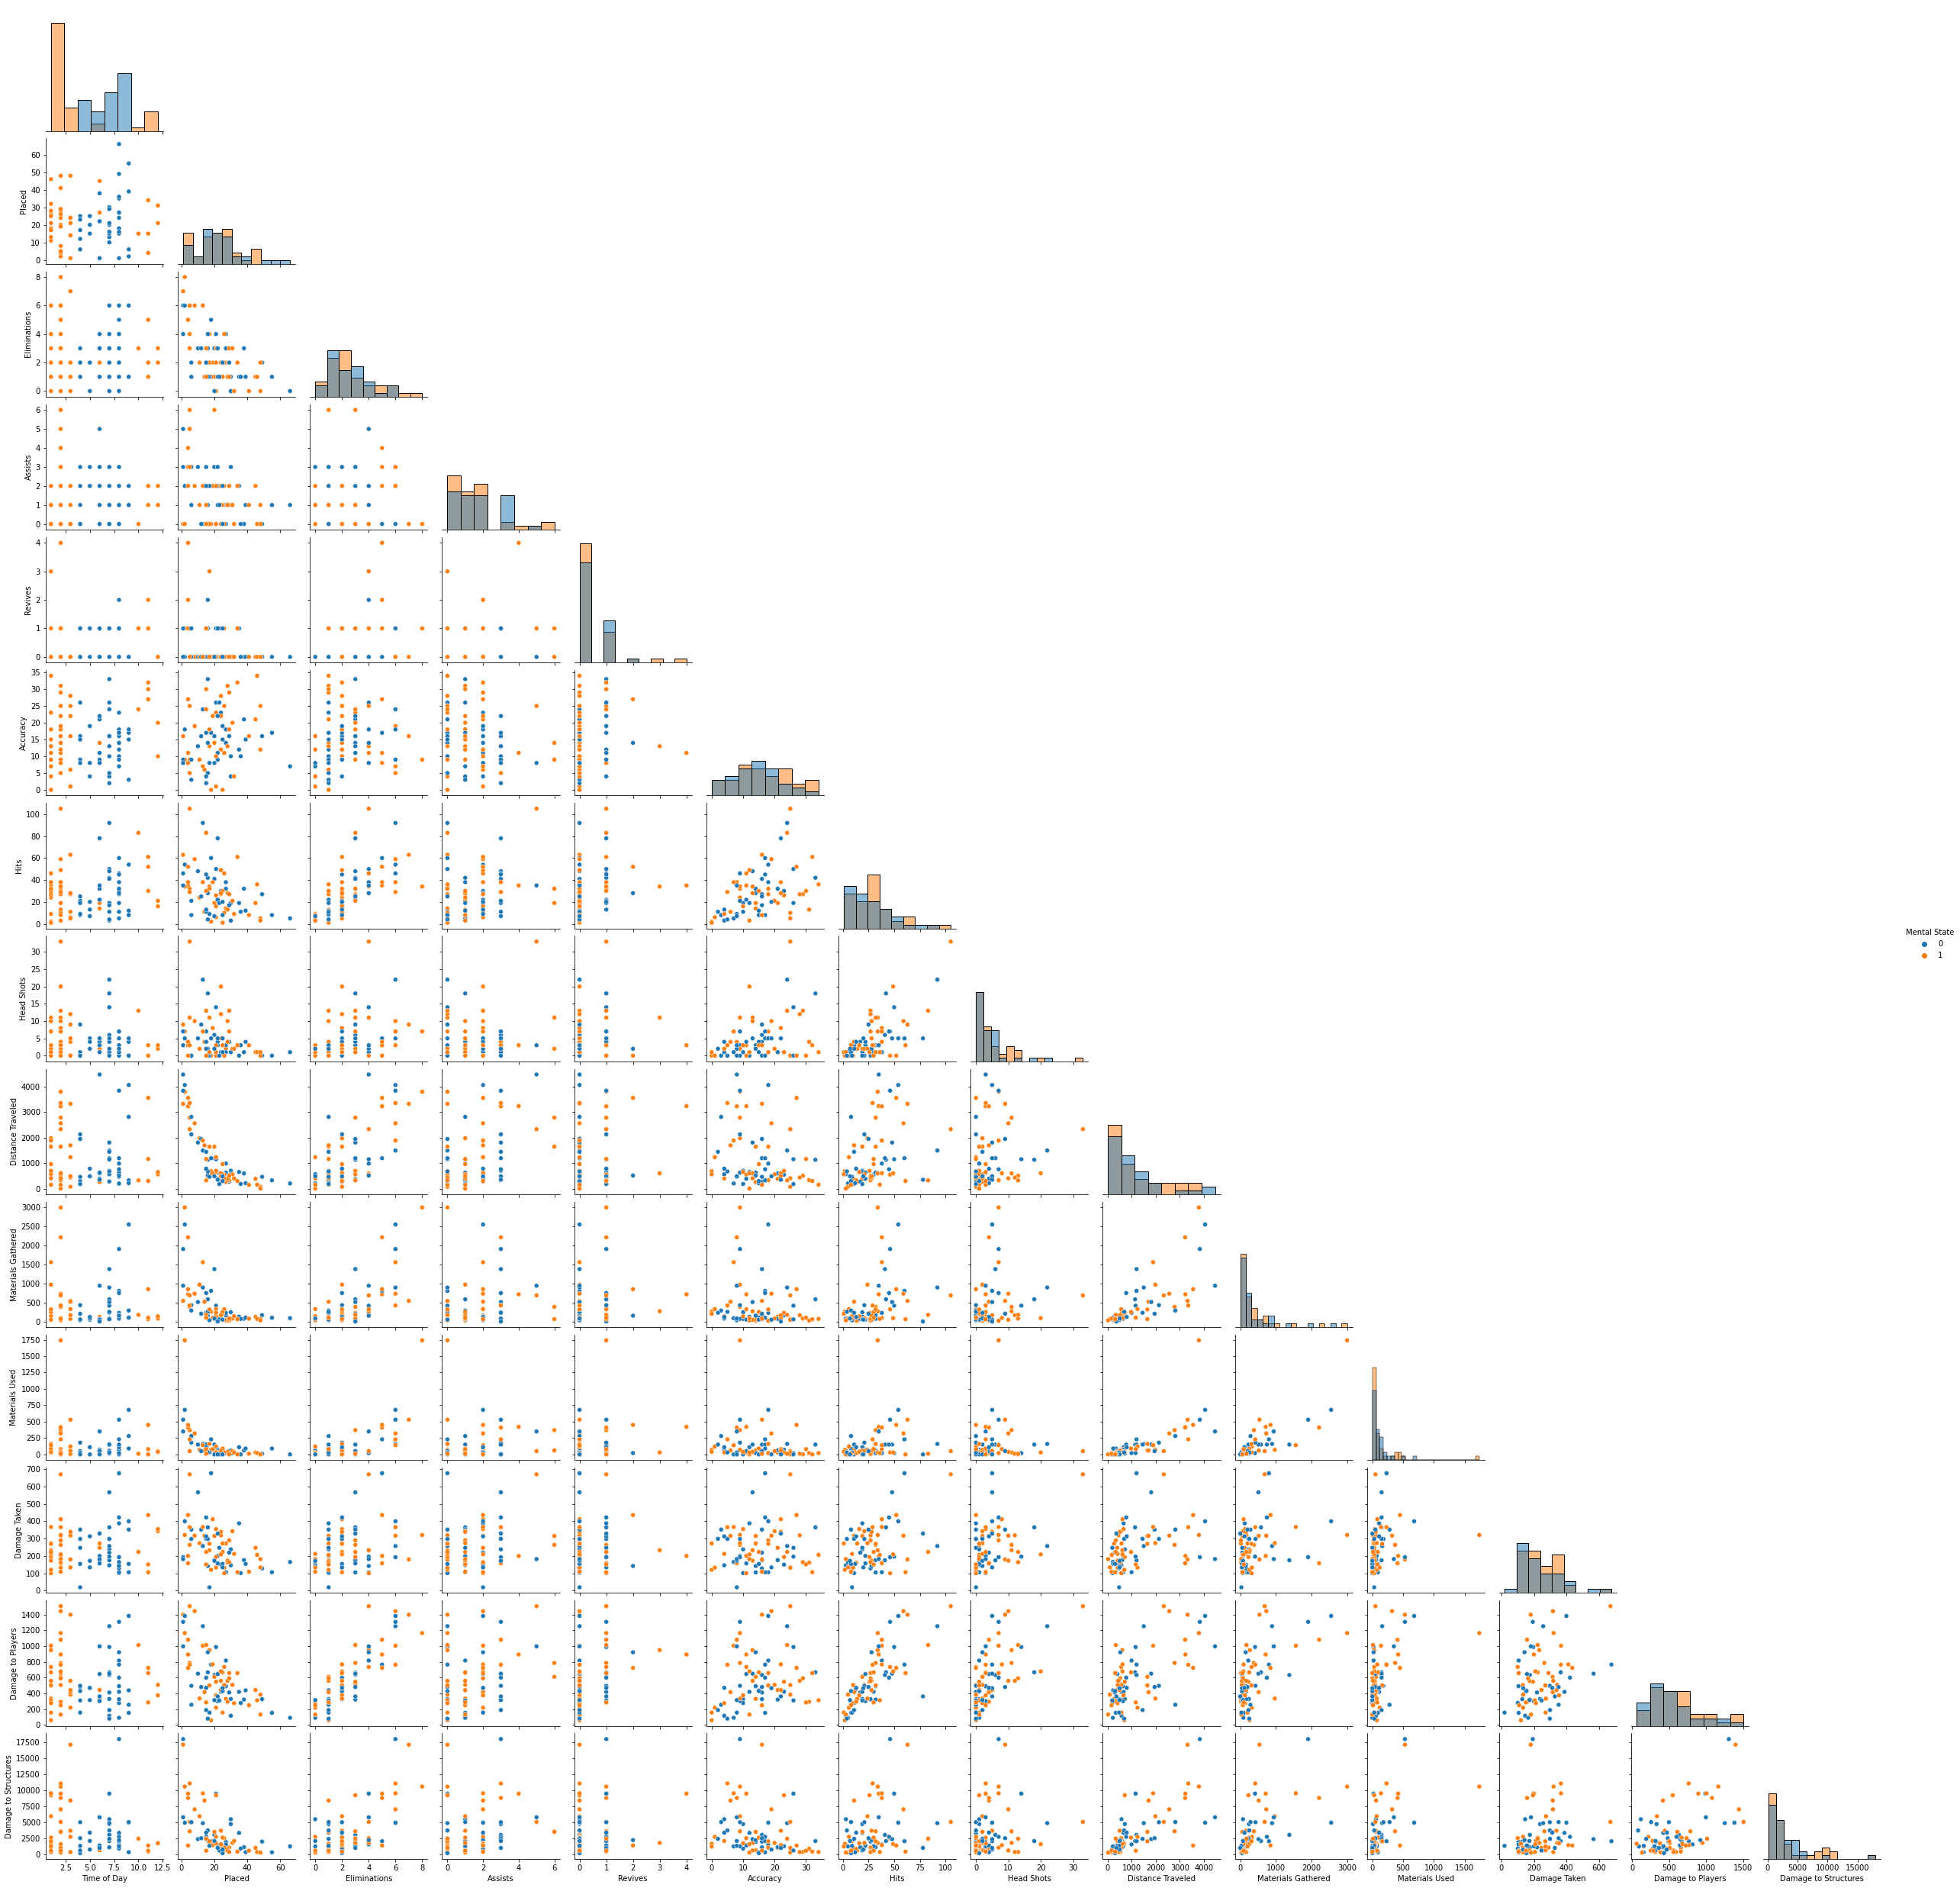

In [13]:
sns.pairplot(df, hue="Mental State",diag_kind="hist",corner=True);plt.show()

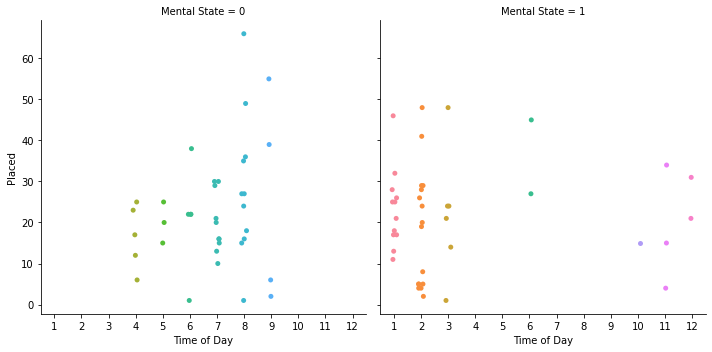

In [14]:
sns.catplot(x="Time of Day",col="Mental State",y="Placed",data=df)# 0 means "high" and 1 means "Sober"

In [15]:
x=df.loc[:,["Placed",'Time of Day', 'Eliminations','Assists', 'Revives','Accuracy',
            'Hits', 'Head Shots','Distance Traveled', 'Materials Gathered',
            'Materials Used','Damage Taken', 'Damage to Players', 'Damage to Structures']]
y=df["Mental State"]

<AxesSubplot:>

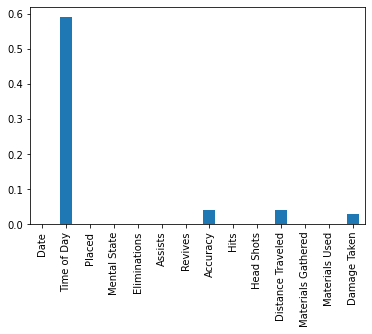

In [16]:
from sklearn.feature_selection import mutual_info_classif
important_features =mutual_info_classif(x,y)
feat_importances=pd.Series(important_features,df.columns[0:len(df.columns)-2])
feat_importances.plot(kind="bar")

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=100)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test);y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred)*100)

[[ 8  0]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

95.0


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

In [21]:
X=df.loc[:,["Mental State",'Time of Day', 'Eliminations','Assists', 'Revives','Accuracy',
            'Hits', 'Head Shots','Distance Traveled', 'Materials Gathered',
            'Materials Used','Damage Taken', 'Damage to Players', 'Damage to Structures']]
Y=df.Placed

# SPLITTING THE DATASET INTO TRAINING SET & TEST SET:

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

<AxesSubplot:>

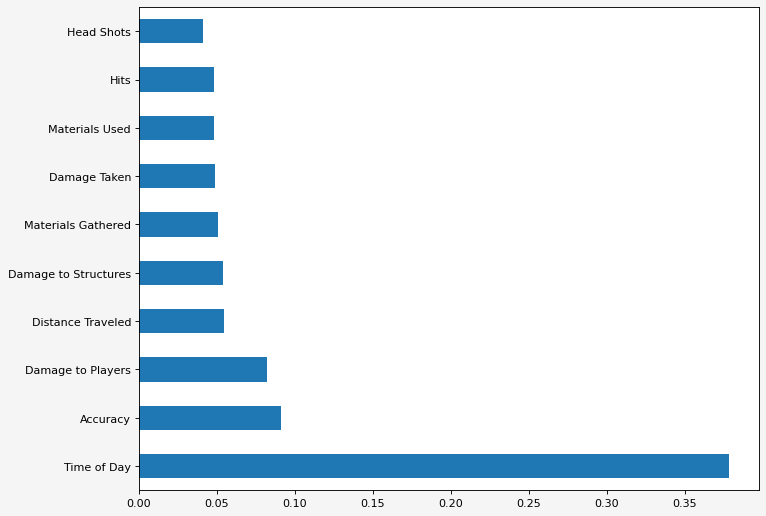

In [23]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='whitesmoke', edgecolor='pink')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(10).plot(kind='barh')

In [24]:
input_size=14
output_size=1
models = tf.keras.Sequential()
models.add(Dense(10, activation = 'relu', input_dim = input_size))
models.add(Dense(units = 5, activation = 'sigmoid'))
models.add(Dropout(0.2))
    # Adding the third hidden layer
models.add(Dense(units = 5, activation = 'relu'))
models.add(Dropout(0.2))

models.add(Dense(units = 5, activation = 'relu'))
models.add(Dense(units = 5, activation = 'relu'))
    # Adding the output layer
models.add(Dense(units = 1))
models.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.02), loss = 'mean_squared_error')
history=models.fit(X,Y,epochs=200,verbose=1)
history


2022-12-23 16:26:32.753277: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-23 16:26:32.984600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 623.6539
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 926.0415
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 527.4512
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 451.0871
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 391.8457
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 344.6791
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 308.2675
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 278.8560
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 256.8879
Epoch 10/200
3/3 [==============================] - 0s 3ms/step - loss: 238.1988
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 224.7097
Epoch 12/200
3/3 [==============================] - 0s 3ms/step - loss: 212.9785
Epoch 13/200
3/3 [===================

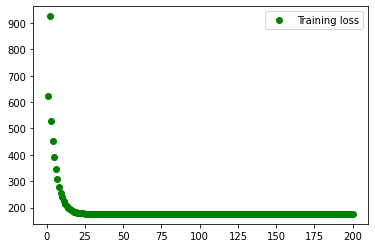

In [25]:
loss=history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'go', label='Training loss')
plt.legend()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, Y_train)  
Y_pred = regressor.predict(X_test)

In [27]:
df_NEW=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})

In [28]:
df_NEW

,Actual,Predicted
50,28,28.47
27,18,29.64
30,2,2.73
77,34,28.20
45,25,31.25
71,25,26.39
66,16,27.44
68,13,11.22
48,21,24.81
69,5,4.84


In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 6.973000000000001
Mean Squared Error: 97.57641000000001
Root Mean Squared Error: 9.878077242054752


In [30]:
errors = abs(Y_pred - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 6.97 degrees.
Accuracy: 65.97 %.


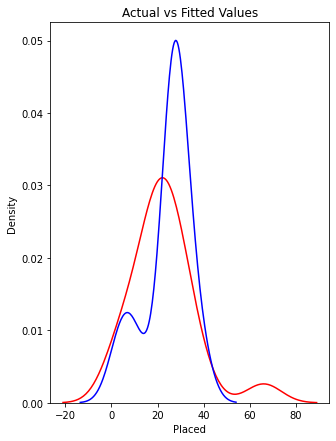

In [31]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')


plt.show()

# Mental state prediction is a complex and sensitive topic, and it is important to approach it with caution and a deep understanding of the limitations and ethical considerations involved. While machine learning techniques such as random forests can be used to make predictions about mental states, it is important to recognize that these predictions are not always accurate and should not be used to make decisions about an individual's care or treatment.

# It is also important to consider the ethical implications of mental state prediction. There are concerns around the potential for these models to perpetuate biases and discrimination, and there is a need for careful consideration of the potential consequences of using such models.

# In conclusion, while mental state prediction using machine learning techniques such as random forests is a promising area of research, it is important to approach it with caution and to carefully consider the limitations and ethical implications of such predictions.